In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [32]:
len(x_train) # 60,000 data samples for training the model

60000

In [4]:
len(x_test) # 10,000 data samples for testing the model

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
# Now to improve the accuracies while training we will scale the datasets by dividing all the values by 255(as the nos. are b/w 0 to 255)
x_train = x_train/255
x_test = x_test/255

###  The values now are in between 0 and 1

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
(x_train[0])
# Each dataset is a 28x28 image. Hence, shown as a 2D matrix representing values in RGB format

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Lets plot the first image from the training dataset

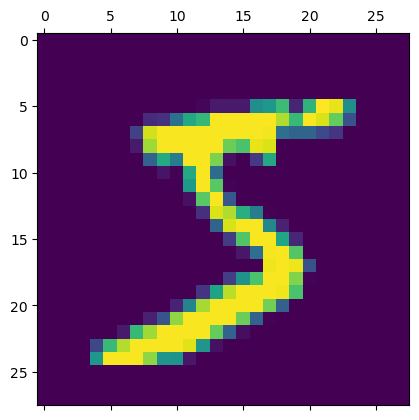

In [9]:
# Using matshow of matplotlib
plt.matshow(x_train[0])

In [10]:
y_train[0]

5

### Now flatten the 2D matrix into a single to feed it into the neural network

In [11]:
# As we want our matrix of (60000,784)
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [12]:
x_test_flattened.shape

(10000, 784)

In [13]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
# Now the neural network is created with 10 neurons at output and 784(28*28) at the input
# and each neuron connected to one another(through 'Dense')

In [15]:
# Now compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
# Training the modeL
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4689 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3041 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2668 - accuracy: 0.9258


### Evaluating the model on a test dataset

In [17]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2679 - accuracy: 0.9268


[0.26785120368003845, 0.926800012588501]

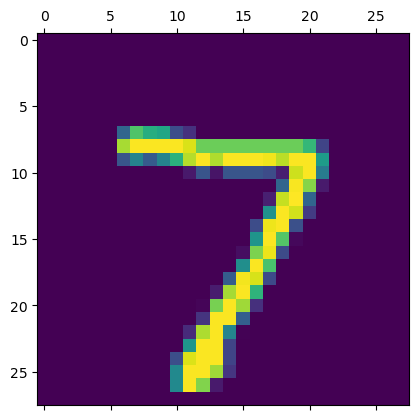

In [18]:
plt.matshow(x_test[0])

In [19]:
y_preds = model.predict(x_test_flattened)
y_preds[0]

313/313 [==============================] - 0s 1ms/step


array([3.52300331e-02, 4.16327026e-07, 7.78594092e-02, 9.53048050e-01,
       3.42376134e-03, 1.10553466e-01, 2.37521681e-06, 9.99799132e-01,
       9.53174382e-02, 6.07434273e-01], dtype=float32)

In [20]:
np.argmax(y_preds[0])
# It prints the index of the maximum value in the array

7

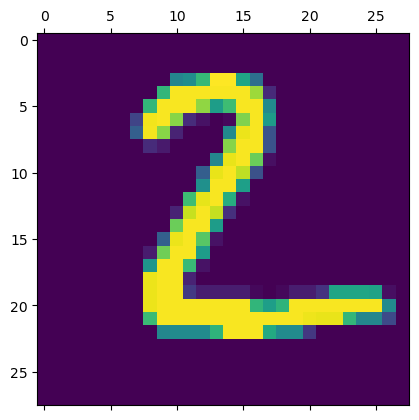

In [21]:
plt.matshow(x_test[1])

In [22]:
y_preds[1]

array([5.6773591e-01, 1.3273276e-02, 9.9908680e-01, 3.5518649e-01,
       6.5598316e-10, 8.3627850e-01, 9.1629827e-01, 1.0359333e-12,
       1.6116832e-01, 1.9773851e-09], dtype=float32)

In [23]:
np.argmax(y_preds[1])

2

In [24]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [25]:
y_predicted_labels = [np.argmax(i) for i in y_preds]
y_predicted_labels[:5]
# Model is predicting correctly

[7, 2, 1, 0, 4]

In [26]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    4,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [  10,   11,  931,   16,    8,    2,   13,    9,   30,    2],
       [   5,    0,   24,  911,    0,   27,    4,   11,   20,    8],
       [   2,    1,    5,    0,  920,    0,   11,    4,   11,   28],
       [  12,    3,    2,   24,    9,  781,   18,    7,   30,    6],
       [  11,    3,    7,    1,    7,    9,  917,    2,    1,    0],
       [   1,    6,   26,    3,   10,    1,    0,  955,    3,   23],
       [  10,   11,    8,   20,    9,   25,   10,   12,  864,    5],
       [  12,    7,    1,   10,   31,    8,    0,   26,    7,  907]])>

### Now visualizing our confusion matrix

In [27]:
import seaborn as sn

Text(95.72222222222221, 0.5, 'Truth')

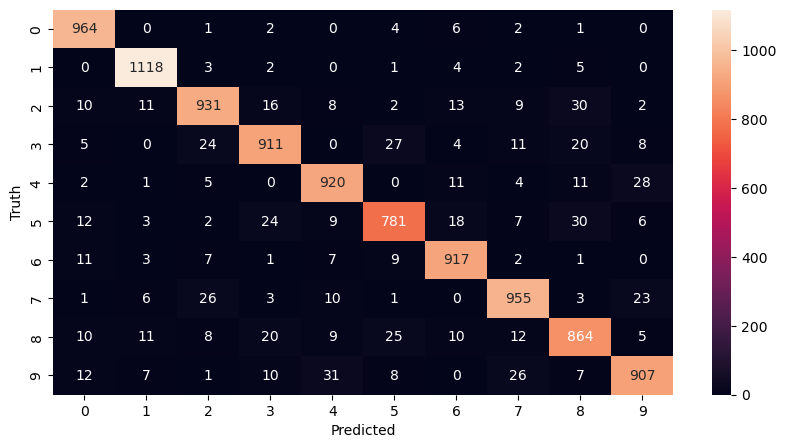

In [28]:
plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### In the above heatmap the values not in the diagonal are errors and the diagonal values represents the no. of times the model predicted digits correctly

# Now adding one hidden layer in our network

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2707 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1221 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0857 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0636 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0502 - accuracy: 0.9845


In [30]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0788 - accuracy: 0.9762


[0.07882218807935715, 0.9761999845504761]

### Previously the accuracy without any hidden layer is 92 and now it improved upto 97

### Now once again visualize this model's predictions

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

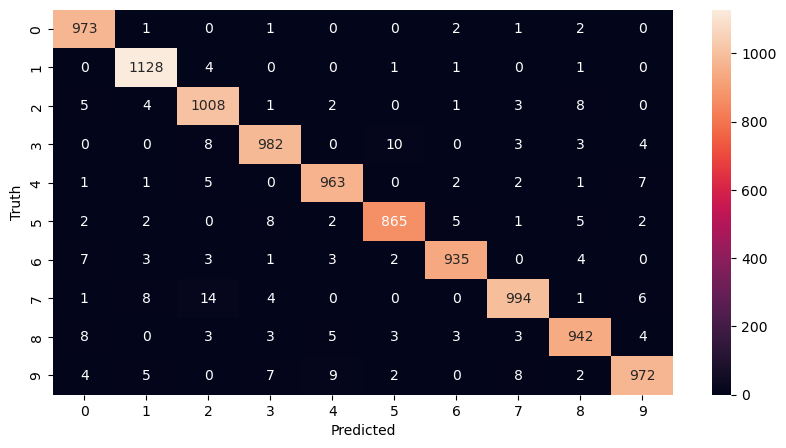

In [31]:
y_preds = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_preds]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Now in the diagonal the nos. will be increased and the non-diagonal values will be decreased...

#                                         !!!...Done...!!! 🙂